# Workshop 5: Deterministic Analysis (notebook 1 of 2)

The purpose of this notebook is to help you understand the limit-state function, but use it deterministically, prior to running the reliability analyses. It is not trivial to take a complex code like FEM with multiple functions and turn it into a "simple" limit-state function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import time

## Task 1: Load FEM model

The material properties can be adjusted in the `FEM.py` file.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:3px 20px; color: black; border-radius: 10px; width: 95%">
<p>
<b>Task 1:</b>
execute the cell below to import the FEM model and confirm the initial conditions and material properties of the beam are set up. Read the cell output to get an overview of the results. It would be good to scan through the file quickly to see what the contents are (especially since you are covering this topic in the computational modelling unit!).
</p>
</div>

Height of the beam: 2.38e+01 m
Width of the beam: 9.20e+00 m
Area of the beam: 3.80e+01 m2
E-modulus of the beam: 5.00e+10 Pa
Torsion constant of the beam: 5.07e+04 m4
Shear modulus of the beam: 1.92e+10 Pa
Density of the beam: 2.50e+03 kg/m3

Mass per unit length of the beam: 1.50e+05 kg/m
Bending stiffness of the beam, x-direction : 4.87e+15 N.m2
Bending stiffness of the beam, z-direction: 7.28e+14 N.m2
Axial stiffness of the beam: 1.90e+12 N
Torsional stiffness of the beam: 9.74e+14 N.m2
Moment of inertia of the beam: 1.27e+08 m2

Number of tunnel elements: 521.0
Deviation of tunnel alignment from straight line, in:
  X: 17007.4 m
  Y: 2003.68 m
  Z: 0 m


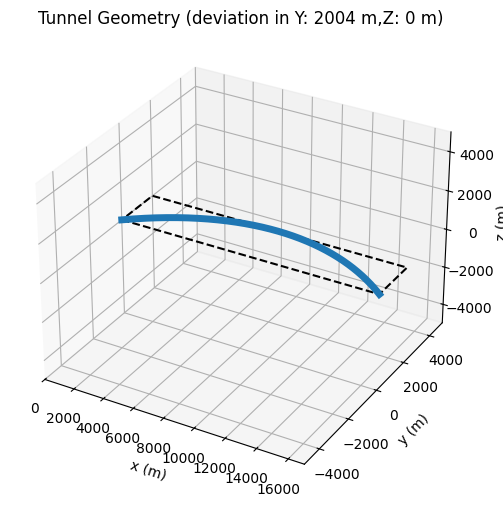

In [2]:
import FEM

## Task 2: compute external forces

Forces on the tunnel are computed using the **Morisson equation**, which is implemented in the file `Morisson_forces.py`.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:3px 20px; color: black; border-radius: 10px; width: 95%">
<p>
<b>Task 2:</b>
import the functions and read the contents of the file and to see what functions are inside. They will be used directly in the next task.
</p>
</div>

In [6]:
import Morrisson_forces

## Task 3: calculate total axial stresses with global matrix

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:3px 20px; color: black; border-radius: 10px; width: 95%">
<p>
<b>Task 3.1:</b>
based on your understanding of the stress calculation algorithm (notebook <code>Analysis_deterministic.ipynb</code>), complete the function to evaluate the total axial stress.
</p>
</div>

In [7]:
def total_calculation_axial_stresses(significant_wave_height_swell,
                                     significant_wave_height_windsea,
                                     U_current_velocity):
    '''Find axial stresses due to wind and swell waves.
    
    Inputs: three load random variables
    Returns: stress
    '''
    start_time = time.time()
    
    sigma_wind = FEM.calculate_axial_stress_FEM(
        Morrisson_forces.F_morison_wind(
            significant_wave_height_windsea))
    
    sigma_swell_and_current = FEM.calculate_axial_stress_FEM(
        Morrisson_forces.F_morison_swell_current(
            significant_wave_height_swell,
            U_current_velocity))
    
    # YOUR_CODE_HERE
    
    # Solution:
    sigma = sigma_wind + sigma_swell_and_current 
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Time to run FEM calculation: "
          + f"{elapsed_time:.2f} seconds")
    
    return sigma 

## Task 4: Run FEM model

Now you can calculate axial stresses for given input values.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:3px 20px; color: black; border-radius: 10px; width: 95%">
<p>
<b>Task 5:</b>
execute the cell below to run the FEM model. Note in particular: a) how long it takes to run an analysis, and b) which parameters will become the random variables in the component reliability analysis. 
</p>
</div>

In [8]:
output_FEM = total_calculation_axial_stresses(significant_wave_height_swell=1,
                                              significant_wave_height_windsea=1,
                                              U_current_velocity=2
                                              )

Time to run FEM calculation: 2.52 seconds


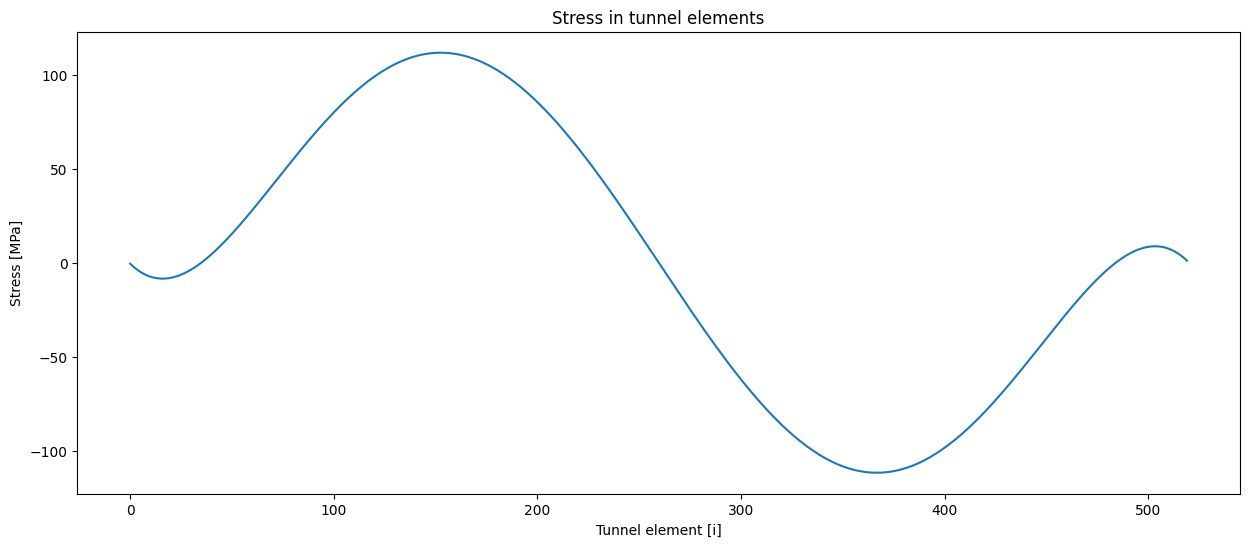

In [ ]:
plt.plot(output_FEM);
plt.ylabel('Stress [MPa]')
plt.xlabel('Tunnel element [i]')
plt.title('Stress in tunnel elements');